In [1]:
#!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pmdarima as pm

<AxesSubplot:xlabel='Date'>

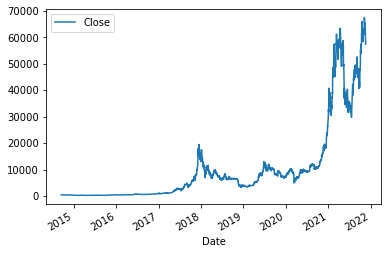

In [3]:
df = yf.Ticker('BTC-USD').history("Max")
df = pd.DataFrame(df['Close'])
df.plot()

In [4]:
df.shape

(2616, 1)

In [5]:
df['LogClose'] = np.log(df['Close'])

In [33]:
Ntest = 60
train =df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [34]:
model = pm.auto_arima(train['Close'],
                     trace = True,
                     suppress_warnings = True,
                     seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=40502.628, Time=6.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=40585.374, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=40558.491, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=40562.224, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=40585.225, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=40552.983, Time=1.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=40550.049, Time=1.74 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=40502.307, Time=26.31 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=40539.068, Time=8.95 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=30.70 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=40529.848, Time=10.85 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=40528.546, Time=13.45 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=40529.158, Time=14.80 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=40532.173, Time=17.56 sec
 ARIM

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 2556
Model:             SARIMAX(3, 1, 4)x(2, 0, [1, 2], 12)   Log Likelihood              -20215.845
Date:                                 Fri, 19 Nov 2021   AIC                          40457.689
Time:                                         13:59:39   BIC                          40533.685
Sample:                                              0   HQIC                         40485.249
                                                - 2556                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.6085     15.929      1.043      0.297     -14.611      47.828
ar.L1          0.4128      0.047      8.748      0.000       0.320       0.505
ar.L2         -0.5103      0.025    -20.612      0.000      -0.559      -0.462
ar.L3          0.8470      0.045     18.876      0.000       0.759       0.935
ma.L1         -0.4542      0.048     -9.416      0.000      -0.549      -0.360
ma.L2          0.5964      0.026     23.032      0.000       0.546       0.647
ma.L3         -0.8649      0.048    -18.105      0.000      -0.959      -0.771
ma.L4          0.0137      0.009      1.459      0.145      -0.005       0.032
ar.S.L12      -1.2939      0.127    -10.158      0.000      -1.544      -1.044
ar.S.L24      -0.5753      0.093     -6.201      0.000      -0.757      -0.393
ma.S.L12       1.2237      0.125      9.758      0.000       0.978       1.469
ma.S.L24       0.5664      0.081      6.962      0.000       0.407       0.726
sigma2      4.562e+05   3981.645    114.574      0.000    4.48e+05    4.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             64640.49
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            1758.48   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
test_pred, confint = model.predict(n_periods = Ntest, return_conf_int =True)

In [38]:
confint

array([[46123.23581925, 48770.83879058],
       [46012.00838608, 49679.67009235],
       [45745.26044217, 50311.94828614],
       [45024.57790165, 50383.78855337],
       [44801.25710911, 50797.5616701 ],
       [44778.59588545, 51377.1734313 ],
       [44300.15832349, 51512.13553917],
       [43952.07469744, 51704.84601969],
       [43957.30076113, 52197.64827614],
       [43933.40491807, 52681.4667338 ],
       [43585.75258719, 52823.42308428],
       [43195.25306766, 52866.14891782],
       [42897.32475149, 52948.71337325],
       [42438.96888114, 52887.37452628],
       [42125.24268631, 52932.59385172],
       [42268.62429556, 53413.91331742],
       [42067.91266794, 53571.24535797],
       [41622.82242362, 53471.94530825],
       [41726.89878505, 53889.45265808],
       [41689.2548976 , 54172.38134592],
       [41299.24964624, 54111.13797007],
       [41019.03573208, 54132.50323102],
       [41085.53006216, 54490.42122253],
       [41117.45918146, 54828.17898651],
       [41038.83

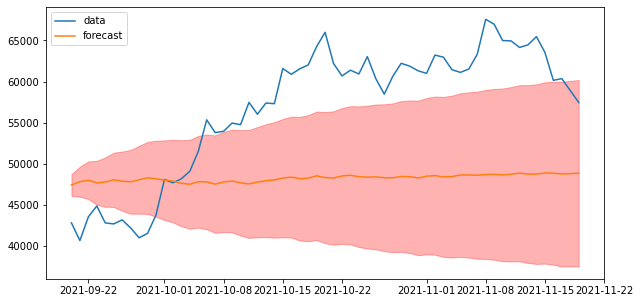

In [39]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['Close'], label = 'data')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index,\
               confint[:,0], confint[:,1],\
               color = 'red', alpha=0.3)
ax.legend()

In [40]:
train_pred = model.predict_in_sample(start = 0, end = -1)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(df.index, df['Close'], label = 'data')
ax.plot(train.index, train_pred, label = 'fitted')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1],color = 'red', alpha=0.3)

ax.legend()

ValueError: In-sample predictions undefined for start=0 when d=1

In [41]:
logmodel = pm.auto_arima(train['LogClose'],
                        trace = True,
                        suppress_warnings = True,
                        seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-9254.225, Time=10.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-9263.338, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-9261.147, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-9261.125, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-9259.936, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-9261.685, Time=0.68 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-9261.677, Time=0.80 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-9259.979, Time=1.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-9262.816, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-9262.790, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-9260.882, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 15.614 seconds


In [42]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2556
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4633.669
Date:                Fri, 19 Nov 2021   AIC                          -9263.338
Time:                        14:01:04   BIC                          -9251.646
Sample:                             0   HQIC                         -9259.098
                               - 2556                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.001      2.266      0.023       0.000       0.003
sigma2         0.0016   1.72e-05     90.465      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):             14334.77
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ValueError: x and y must have same first dimension, but have shapes (60,) and (10,)

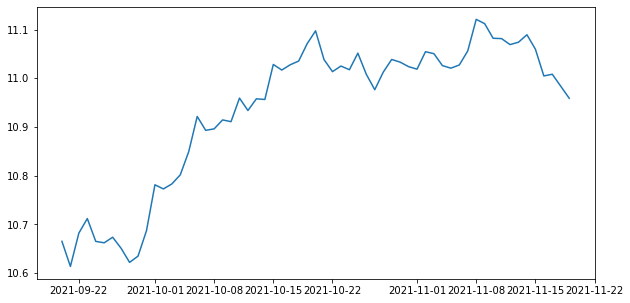

In [43]:
test_pred_log, confint = logmodel.predict(n_preiods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogClose'], label = 'data')
ax.plot(test.index, test_pred_log, label = 'forecast')
ax.fill_between(test.index,\
               confit[:,0], confint[:,1],\
               color='red', alpha=0.3)
ax.legend()

In [67]:
### non-seasonal
model = pm.auto_arima(train['LogClose'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18227.402, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=11280.243, Time=0.48 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9350.821, Time=0.89 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9349.027, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-9328.134, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-9176.415, Time=2.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=1.55 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.72 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-9350.866, Time=2.06 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=i

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2585
Model:               SARIMAX(5, 0, 2)   Log Likelihood                4683.926
Date:                Thu, 18 Nov 2021   AIC                          -9351.852
Time:                        15:07:11   BIC                          -9304.992
Sample:                             0   HQIC                         -9334.868
                               - 2585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8578      0.033    -26.160      0.000      -0.922      -0.794
ar.L2          0.8749      0.021     41.377      0.000       0.833       0.916
ar.L3          0.9775      0.035     27.995      0.000       0.909       1.046
ar.L4          0.0187      0.018      1.046      0.296      -0.016       0.054
ar.L5         -0.0133      0.016     -0.813      0.416      -0.045       0.019
ma.L1          1.8395      0.030     60.407      0.000       1.780       1.899
ma.L2          0.9560      0.029     32.528      0.000       0.898       1.014
sigma2         0.0016   1.88e-05     82.867      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13642.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

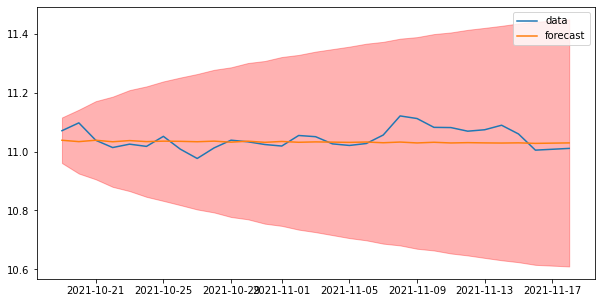

In [71]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogClose'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

ValueError: x and y must have same first dimension, but have shapes (2615,) and (100,)

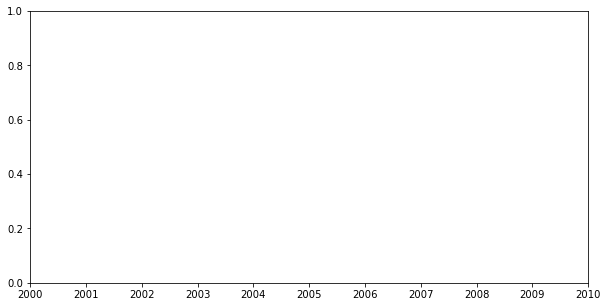

In [77]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df[-100:]['LogClose'], label='data')
ax.plot(train.index[1:], train_pred[-100:], label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();